In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df = pd.read_csv("bookReviewsData.csv")

df.head()


,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [6]:
print(df.shape)

(1973, 2)


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [ ]:
# YOUR CODE HERE
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet# wordnet.synsets('test')
from nltk import pos_tag
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
import tensorflow.keras as keras
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\meron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\meron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\meron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\meron\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Positive Review
0    993
1    980
Name: count, dtype: int64


Text(0, 0.5, 'Number of Reviews')

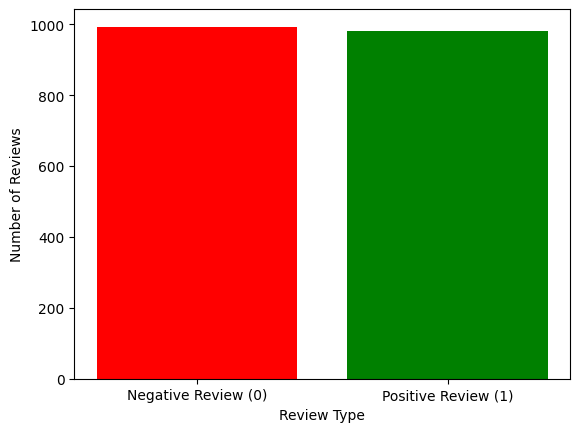

In [11]:
#converting my second column into numerics
df['Positive Review'] = df['Positive Review'].apply(lambda x: 1 if x == True else 0)

#checking my class balance of my boolean
counts = df['Positive Review'].value_counts()

print(counts)
plt.bar(counts.index,counts.values,tick_label=['Negative Review (0)', 'Positive Review (1)'], color=['red', 'green'])

plt.xlabel('Review Type')
plt.ylabel('Number of Reviews')

In [24]:
#cleaning text data

#Lowercasing all my results
df['Review'] = df['Review'].str.lower()
df['Review']

#removing punctuation and any non alphabetic characters
pattern_alphanumeric_whitespace = r'[^a-zA-Z0-9\s]'

df['reviews_cleaned'] = df['Review'].str.replace(pattern_alphanumeric_whitespace, '', regex=True)


#removing stop words
eng_stopwords = stopwords.words('english')

filtered_rev = []
for review in df['reviews_cleaned']:
    word_tokens = word_tokenize(review)
    filtered_words = [word for word in word_tokens if word not in eng_stopwords]
    filtered_rev.append(filtered_words)
            

print("Finished")



Finished


In [25]:
#lemmatization
print("Starting")

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].lower()
    tag_dict = {"a": wordnet.ADJ,
                "n": wordnet.NOUN,
                "v": wordnet.VERB,
                "r": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

lemmatized_reviews = []

for review_tokens in filtered_rev:
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in review_tokens]
    lemmatized_reviews.append(" ".join(lemmatized))

df['lemmatized_review'] = lemmatized_reviews

print("Finished")

Starting
Finished


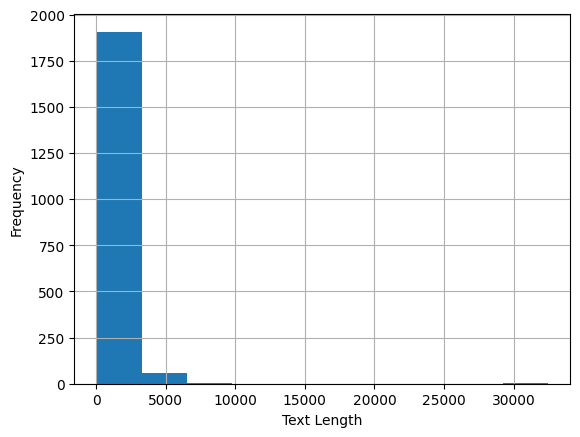

In [26]:
#EDA

#
df['Review'].str.len().hist()
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

#

In [39]:
X = df["Review"]

y = df['Positive Review']
#Splitting my data

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.3,random_state = 1234)

In [40]:
#tf-idf model vectorizing 

tfidf_vectorizer = TfidfVectorizer()
# 2. Fit the vectorizer to X_train
# YOUR CODE HERE

tfidf_vectorizer.fit(X_train)
# 3. Using the fitted vectorizer, transform the training data 
# YOUR CODE HERE
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [41]:
#Logistic Regression Model training and predicting
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)
# Finding model's accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print(f'Accuracy of our linear regression model : {lr_accuracy}')


Accuracy of our linear regression model : 0.8192567567567568


In [ ]:
#plotting how our linear regression model performance over time 


In [42]:
#Random Forest  
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf,y_train)

y_pred_rf = rf_model.predict(X_test_tfidf)

rf_accuracy = accuracy_score(y_test,y_pred_rf)

print(f'Accuracy of our linear regression model : {rf_accuracy}')

f1 = f1_score(y_test, y_pred_rf)
print(f"F1 Score: {f1}")

cm = confusion_matrix(y_test,y_pred_rf)
print(cm)

Accuracy of our linear regression model : 0.768581081081081
F1 Score: 0.7617391304347826
[[236  50]
 [ 87 219]]


In [ ]:
#hyperparameter tuning for LR
param_grid ={
    'C' :[10**i for i in range(-5,5)]
}


print('Running Grid Search...')


grid = GridSearchCV(lr_model, param_grid, cv=5)

grid_search = grid.fit(X_train_tfidf,y_train)
print('Done')

Running Grid Search...
Done


In [46]:
best_C = grid_search.best_params_['C']

best_C

1000

In [47]:
#training the best logistic regresison model 
lr_model_best = LogisticRegression(max_iter = 1000,C = best_C)
lr_model_best.fit(X_train_tfidf,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1000
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [51]:


#hyperparameter tuning FOR RF
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10]
}


print('Running Grid Search...')


grid = GridSearchCV(rf_model, param_grid, cv=5)

grid_search = grid.fit(X_train_tfidf,y_train)
print('Done')

Running Grid Search...
Done


In [ ]:
rf_model_best = grid_search.best_estimator_

rf_model_best

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
estimators = [
    ('lr', lr_model_best), # A tuple: ('name', unfitted_estimator_object)
    ('rf', rf_model_best)  # A tuple: ('name', unfitted_estimator_object)
]
#building my ensemble model
stacked_model = StackingClassifier(estimators = estimators,cv = 5)
stacked_model.fit(X_train_tfidf, y_train)


,estimators,"[('lr', ...), ('rf', ...)]"
,final_estimator,None
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1000


In [63]:
y_pred_stack = stacked_model.predict(X_test_tfidf)
stack_accuracy = accuracy_score(y_test, y_pred_stack)

print(f"Accuracy of the stacking model: {stack_accuracy}")


Accuracy of the stacking model: 0.8293918918918919


              precision    recall  f1-score   support

           0       0.83      0.82      0.82       286
           1       0.83      0.84      0.84       306

    accuracy                           0.83       592
   macro avg       0.83      0.83      0.83       592
weighted avg       0.83      0.83      0.83       592

AUC Score: 0.9114


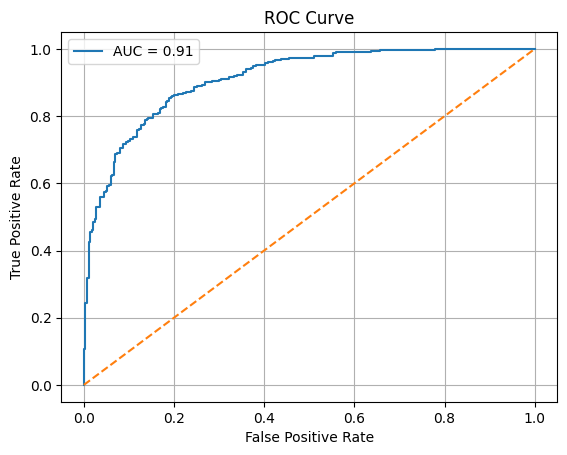

In [64]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_probs = stacked_model.predict_proba(X_test_tfidf)[:, 1]
y_pred = stacked_model.predict(X_test_tfidf)

# Classification report
print(classification_report(y_test, y_pred))

# AUC Score
auc = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


This graph demonstrates that my model demonstrates strong performance in classification. With an overall accuracy of 83%, it correctly predicts outcomes most of the time. Digging deeper, its precision and recall scores (around 83-84%) for both classes are consistent and high, indicating it's reliable in identifying both positive and negative instances without significant bias towards one. Most notably, the AUC score of 0.91, clearly visualized by the ROC curve hugging the top-left corner, signifies that my ensemble model is excellent at distinguishing between the two classes, performing significantly better than random chance.




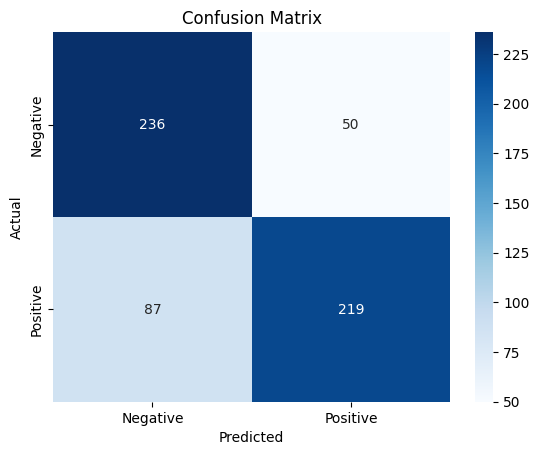

In [65]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This confusion matrix reveals your classification model's performance by showing how many predictions were correct versus incorrect for "Negative" and "Positive" categories. Out of 592 total predictions, your model correctly identified 236 true negatives and 219 true positives, resulting in about 76.8% overall accuracy. While generally performing well, the model shows a slight tendency to miss positive instances (87 false negatives) more often than it incorrectly flags negative ones as positive (50 false positives). This means it's more likely to classify a genuinely positive book review as negative than vice-versa, which could lead to good books being overlooked.

In [ ]:

np.random.seed(42)  
sample_indices = np.random.choice(len(X_test), 3, replace=False)

print(" Example Predictions on Test Book Reviews")
print("~ "*80)

for index in sample_indices:
    review_text = X_test.iloc[index]
    true_label = y_test.iloc[index]
    
    vectorized = tfidf_vectorizer.transform([review_text])
    
    predicted_label = stacked_model.predict(vectorized)[0]
    confidence = stacked_model.predict_proba(vectorized)[0][1] 
    
    print("-" * 60)
    print(review_text[:400] + ("..." if len(review_text) > 400 else ""))
    print(f"\n True Label:     {'Positive' if true_label else 'Negative'}")
    print(f" Predicted:      {'Positive' if predicted_label else 'Negative'}")
    print(f" Confidence:     {confidence:.2f}")
    print("~ "*80)


 Example Predictions on Test Book Reviews
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 
------------------------------------------------------------
we have now entered a second time of deep concern for the science, math, and technological education for everyone. the first one occurred after the sputnik fiasco, when the russians beat us in the race to reach space. the  concern now has risen due to what science groups such as the american  association for the advancement of science, and educators saw in comparison  of assessments made of studen...

 True Label:     Positive
 Predicted:      Positive
 Confidence:     0.86
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ 
------------------------------------------------------------
i have loved many of jodi picoult's

From these three examples, we can see that the stacked model accurately classified all three example book reviews, demonstrating high confidence in its positive predictions (0.81, 0.86) and effectively identifying the negative sentiment with a low positive confidence (0.12), indicating strong performance in discerning both positive and negative tones in the text.
